In [ ]:
import sys
sys.path.append("C:/Users/E1005279/OneDrive - Sanlam Life Insurance Limited/MWL/MWLrepo/MiWayLife2/Data_Analysis_Package")
from data_preparation import DataPreparation, Analysis, multi_data_ops
import data_operations as do

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL
import math


import data_transforations as data_tr

# Loading data

In [7]:
path = "C:/Users/E1005279/OneDrive - Sanlam Life Insurance Limited/MWL/Lapse Rate Projections/Data/"

at_inception_data = pd.DataFrame(pd.read_csv(path+"inception_data.csv"))
near_ftr_lapse_data = pd.DataFrame(pd.read_csv(path+"near_ftr_lapse_data.csv"))

# Redoing data

In [2]:
path = "C:/Users/E1005279/OneDrive - Sanlam Life Insurance Limited/MWL/Lapse Rate Projections/Data/"

calls_data = pd.DataFrame(pd.read_csv(path+"call_reason.csv"))
sales_data = pd.DataFrame(pd.read_csv(path+"sales.csv"))
policy_data = pd.DataFrame(pd.read_csv(path+"policy_data.csv"))
payment_data = pd.concat([pd.DataFrame(pd.read_csv(path+"Payment_data_1.csv")),pd.DataFrame(pd.read_csv(path+"Payment_data_2.csv"))])
lapse_data = pd.concat([pd.DataFrame(pd.read_csv(path+"lapse_1.csv")),pd.DataFrame(pd.read_csv(path+"lapse_2.csv"))])

## Filtering data to relevant policies

Relevant policies are policies that have been incepted. The rpt_datamodel_lapse has incepted policies only, hence filtering on policies within that dataset

In [3]:
pol_names = list(lapse_data['policy_name'])
sales_data = sales_data[sales_data['policy_name'].isin(pol_names)]
pol_ids= list(sales_data['policy_id'])
calls_data = calls_data[calls_data['policy_name'].isin(pol_names)]
payment_data = payment_data[payment_data['policy_id'].isin(pol_ids)]
policy_data = policy_data[policy_data['policy_name'].isin(pol_names)]

#Make date column of data type datetime
sales_data=do.dtype_datetime(sales_data)
calls_data=do.dtype_datetime(calls_data)
payment_data=do.dtype_datetime(payment_data)
policy_data=do.dtype_datetime(policy_data)
lapse_data=do.dtype_datetime(lapse_data)


In [4]:
len(set(pol_names)),len(set(pol_ids)),sales_data['policy_id'].nunique(), calls_data['policy_name'].nunique(), payment_data['policy_id'].nunique(),policy_data['policy_name'].nunique()

(65364, 65364, 65364, 39590, 63981, 65364)

## Aggregating call, payment, sales and lapse data then merging

In [ ]:
pre_inception_calls_data = data_tr.pre_sale_calls(calls_data,policy_data)
post_sale_calls_data = data_tr.post_sale_calls(calls_data,policy_data)
payment_hist_data = data_tr.payments_history(payment_data,current_date='2025-08-01')
lapse_data = data_tr.lapses(lapse_data)
sales_data = sales_data.drop_duplicates(subset=['policy_id'], keep='last')

In [ ]:
inception_data = data_tr.at_inception_data_merge(pre_inception_calls_data, sales_data,policy_data,lapse_data)
near_ftr_lapse_data = data_tr.post_sale_data_merge(post_sale_calls_data, sales_data,policy_data,lapse_data,payment_hist_data)

# Exploratory Data Analysis

## At point of inception data

In [8]:
at_inception =DataPreparation(df=at_inception_data)
at_inception.null_df

,nulls,percentage nulls
Unnamed: 0,0,0.000000
policy_id,0,0.000000
policy_name,0,0.000000
age,0,0.000000
education,0,0.000000
gender,0,0.000000
income,0,0.000000
smoker_status,1412,2.160211
sold_socio_economic_class,0,0.000000
occupation_class,42576,65.136773


In [9]:
at_inception.uniq_df

,no. of unique entries
Unnamed: 0,65364
policy_id,65364
policy_name,65364
age,48
education,8
gender,2
income,1805
smoker_status,3
sold_socio_economic_class,4
occupation_class,5


In [12]:
at_inception.df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
at_inception.df.dtypes

policy_id                       object
policy_name                     object
age                              int64
education                       object
gender                          object
income                         float64
smoker_status                   object
sold_socio_economic_class      float64
occupation_class                object
occupation                      object
orginal individual_income      float64
partner_income                   int64
lead_provider_name              object
lead_type                       object
sales_channel                   object
sale_date                       object
campaign_name                   object
underwriting_outcome            object
optionality                    float64
hiv_test_required              float64
pricing_version                 object
eml                            float64
pml                            float64
hiv_group                       object
securitygroup_id                object
policy_type              

In [14]:
at_inception.df.columns

Index(['policy_id', 'policy_name', 'age', 'education', 'gender', 'income',
       'smoker_status', 'sold_socio_economic_class', 'occupation_class',
       'occupation', 'orginal individual_income', 'partner_income',
       'lead_provider_name', 'lead_type', 'sales_channel', 'sale_date',
       'campaign_name', 'underwriting_outcome', 'optionality',
       'hiv_test_required', 'pricing_version', 'eml', 'pml', 'hiv_group',
       'securitygroup_id', 'policy_type', 'benefits_count',
       'last_benefit_amount', 'cover_amount_full', 'total_funeral_premium',
       'funeral_count', 'original_premium', 'fixed_debit_day',
       'duration_policy_start_delay', '# calls', '# calls contacted',
       'res_code_QA_sum', 'res_code_claims_sum', 'res_code_no interest_sum',
       'res_code_other_sum', 'res_code_payment_sum', 'res_code_quote_sum',
       'res_code_sale_sum', 'res_code_update_sum', 'policy_status',
       'current_policy_status', 'cancellation_effective_date',
       'cancellation_re

In [26]:
data = at_inception.df
data

,policy_id,policy_name,age,education,gender,income,smoker_status,sold_socio_economic_class,occupation_class,occupation,...,res_code_sale_sum,res_code_update_sum,policy_status,current_policy_status,cancellation_effective_date,cancellation_reason,lapse_type,lapse_flag,expected_lapse_rate,cover_start_date
0,100003c9-2094-3107-e604-65d8e6b4ec03,MWL008050072,51,Matric,Male,40000.0,S,1.0,NaN,NaN,...,0.0,0.0,Active,Active,NaN,NaN,NaN,False,0.015060,2021-11-01
1,10000cc8-8f08-5e2c-b6ad-661d48606710,ML24-0199554,23,Matric + 3 year Diploma,Female,20000.0,N,2.0,A,Administrator,...,0.0,0.0,Active,Active,NaN,NaN,NaN,False,0.036555,2024-06-01
2,100307d2-6857-7f50-833c-66b391c37879,ML24-0254853,63,Matric + 3 year Diploma,Female,45000.0,E,1.0,A,Personal Assistant,...,5.0,0.0,Active,Active,NaN,NaN,NaN,False,0.040727,2024-09-01
3,10048ce0-253d-aeff-4f59-64e76756bddf,ML23-0067459,41,Matric + 3 year Diploma,Male,70000.0,S,1.0,A,Chief Technology Officer (CTO) (< 20% travel),...,0.0,0.0,Active,Active,NaN,NaN,NaN,False,0.030750,2023-10-01
4,10061226-ed6a-b733-47f0-65fb970086cd,MWL007912004,36,4 year Degree,Female,40000.0,N,1.0,NaN,NaN,...,0.0,0.0,Active,Active,NaN,NaN,NaN,False,0.014305,2021-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65359,ffaa032e-2a01-cf52-cc1a-65fb3147c393,MWL006676786,51,Matric + 3 year Diploma,Female,40000.0,N,1.0,NaN,NaN,...,0.0,0.0,Active,Active,NaN,NaN,NaN,False,0.009601,2019-07-01
65360,ffb7087c-78f7-a485-5b7f-65d8d25da2c7,MWL007292690,41,Matric,Female,14000.0,N,2.0,NaN,NaN,...,0.0,0.0,Active,Active,NaN,NaN,NaN,False,0.012001,2020-06-01
65361,ffd20919-303c-e88e-fb1f-65fba1578790,MWL008568948,26,Matric + 3 year Diploma,Female,14000.0,N,2.0,NaN,NaN,...,0.0,0.0,Active,Active,NaN,NaN,NaN,False,0.017760,2022-10-01
65362,ffe1059c-beea-354d-27fa-6629fe94a5cf,MWL006194665,45,3 year Degree,Female,30000.0,N,1.0,NaN,NaN,...,0.0,0.0,Active,Active,NaN,NaN,NaN,False,0.009202,2018-12-01


In [ ]:
class Analysis2(DataPreparation):

    def __init__(self,df,time_series: str,target: str =None, num_cols: list = None, cat_cols: list = None, date_col=None):
        ''' df= dataframe, timeseries='y'/'n' specifies if data is time-series data, target is column name to target correlations to, 
        num_cols/cat_cols is list specifying the numerical and categorical data column names if datatypes not sufficient to distinguish,
          date_col is name of the date column, required for time-series data, can be used to gain more date insights for non-time-series data'''

        if target is not None:
            if df[target].dtype in ['int64','float64','int32','float32']:
                target_dtype = 'num'
            elif df[target].dtype in ['bool']:
                target_dtype = 'bool'
            else:
                target_dtype = 'cat'

        if date_col is not None and time_series.lower() == 'n':
            df[date_col] = df[date_col].dt.date.apply(pd.to_datetime)
            df['Month'] = df[date_col].dt.month.astype('object')
            df['Year'] = df[date_col].dt.year.astype('object')
            df['Day'] = df[date_col].dt.day.astype('object')
            df['Hour'] = df[date_col].dt.hour.astype('object')


        self.df = df

        if cat_cols is None:
            self.cat_cols = list(df.select_dtypes(include=['object','category','bool']).columns)
        else:
            self.cat_cols = cat_cols
        if num_cols is None:
            self.num_cols =  list(df.select_dtypes(include=['int64','float64','int32','float32']).columns)
        else:
            self.num_cols = num_cols
        self.num_df = df[self.num_cols].copy()
        self.cat_df = df[self.cat_cols].copy()
        if target is None:
            self.correlation_df, self.significant_corr = self.correlations()
        else:
            self.correlation_df, self.significant_corr = self.target_correlations(target=target, target_dtype=target_dtype)
        self.num_stats = self.summarize_numeric_stats()
        self.cat_stats = self.summarize_categorical_stats()
        if time_series.lower() == 'y':#time_series
            self.stationarity_df, self.non_stat_df = self.stationarity()#Dickey-Fuller statistic and the p-value for each column, then for only the non-stationary columns (p-value > 0.05)
            self.seasonality_periods = self.seasonality() #the periods of seasonality for columns with the strength of the seasonality > 0.5
            self.seasonalality_df = pd.DataFrame(self.seasonality_periods.values(),index=self.seasonality_periods.keys())
            self.trend_strengths = self.trend({col: info['period'] for col, info in self.seasonality_periods.items()}) #trend strengths for each column, where the period is taken from the seasonality analysis where relevant
            


    def summarize_numeric_stats(self):
        """
        Summarizes numeric statisticals features for given DataFrame. 
        Statistical features are: no. of distinct values, percentage of nulls, mean, meadian, minimum, maximum, standard deviation, mode, 25% quartile and 75% quartile.
        Returns a dataframe with these features for each column
        """
        stats_results = []
        
        for col in self.num_cols:
            data = self.num_df[col]
            stat_dict = {
                'Column': col,
                'Distinct Count': data.nunique(),
                'Null Percentage': round(data.isnull().mean() * 100, 2),
                'Mean': round(data.mean(), 2),
                'Median': round(data.median(), 2),
                'Min': round(data.min(), 2),
                'Max': round(data.max(), 2),
                'Std Deviation': round(data.std(), 2),
                'Mode': round(data.mode()[0], 2) if not data.mode().empty else None,
                'Quartile 25%': round(data.quantile(0.25), 2),
                'Quartile 75%': round(data.quantile(0.75), 2),
            }

            stats_results.append(stat_dict)
        return pd.DataFrame(stats_results)

    def summarize_categorical_stats(self):
        """
        Summarizes categorical statisticals features for given DataFrame. 
        Statistical features are: no. of distinct values, percentage of nulls, the most frequent value, the count of this most frequent value and the percentage of entries the most frequent value is.
        Returns a dataframe with these features for each column
        """
        stats_results = []

        for col in self.cat_cols:
            data = self.cat_df[col]
            most_freq_val = data.mode().iloc[0] if not data.mode().empty else None
            most_freq_count = data.value_counts().iloc[0] if not data.value_counts().empty else 0
            total = len(data)

            stat_dict = {
                'Column': col,
                'Distinct Count': data.nunique(),
                'Null Percentage': round(data.isnull().mean() * 100, 2),
                'Most Frequent': most_freq_val,
                'Frequency Count': most_freq_count,
                'Frequency %': round((most_freq_count / total) * 100, 2)
            }

            stats_results.append(stat_dict)
        return pd.DataFrame(stats_results)

    def ANOVA_corr(self, cols: list, target: str,target_dtype): #cols is a list of the columns to correlate to the target
        '''to find the correlation between a categorical and a numerical variable,'''
        anova_results = {'F-statistic': [], 'P-value': []}
        df = self.df.copy()
        if len(cols) > 0:
            if target_dtype == 'num':
                for col in cols:
                    if len(df[col].unique())>1:
                        groups = [df[df[col] == category][target] for category in df[col].unique()]
                        f_stat, p_value = stats.f_oneway(*groups)
                        anova_results['F-statistic'].append(f_stat)
                        anova_results['P-value'].append(p_value)
            elif target_dtype == 'cat':
                for col in cols:
                        groups = [df[df[target] == category][col] for category in df[target].unique()]
                        f_stat, p_value = stats.f_oneway(*groups)
                        anova_results['F-statistic'].append(f_stat)
                        anova_results['P-value'].append(p_value)
        return anova_results
    
    def pearson_corr(self, num_cols: list, target: str):
        '''Compute Pearson correlation coefficient for numerical variables with a numerical target variable.'''
        pearson_results = {'F-statistic': [], 'P-value': []}
        df = self.df.copy()
        for col in num_cols:
            f_stat, p_value = stats.pearsonr(df[col].values,df[target].values)
            pearson_results['F-statistic'].append(f_stat)
            pearson_results['P-value'].append(p_value)
        return pearson_results
    
    def cramers_v_corr(self, cat_cols: list, target: str):
        """Compute Cramér's V for the correlation between categorical data and a categorical target variable."""
        cramerv_results = {'F-statistic': [], 'P-value': []}
        df = self.df.copy()
        for col in cat_cols:
            confusion_matrix = pd.crosstab(df[col].values, df[target].values)
            f_stat, p_value, dof, expected = stats.chi2_contingency(confusion_matrix)#Compute the chi-squared statistic
            cramerv_results['F-statistic'].append(f_stat)
            cramerv_results['P-value'].append(p_value)
        return cramerv_results
    
    def pointbiserial_corr(self, num_cols: list, target: str):
        """Compute Point Biserial correlation for a numerical variable and a binary categorical variable."""
        pointbiserial_results = {'F-statistic': [], 'P-value': []}
        df = self.df.copy()
        for col in num_cols:
            f_stat, p_value = stats.pointbiserialr(df[target].values.astype(int), df[col].values)
            pointbiserial_results['F-statistic'].append(f_stat)
            pointbiserial_results['P-value'].append(p_value)
        return pointbiserial_results

        
    
    def target_correlations(self,target: str,target_dtype: str):
        '''Imputes or drops columns with missing values, then gets correlations of all columns to the specified target. '''
        #________________categorical data preparations_________________
        cat_df = self.cat_df.copy()
        drop = []
        impute = []
        null_df,high_null_cols = do.nulls(cat_df,nulls_threshold=30)
        for col in high_null_cols:
            if null_df['percentage nulls'].loc[[col]].values > 50:
                drop.append(col)
            else:
                impute.append(col)
        drop_na = list(set(cat_df.columns)-set(high_null_cols))
        cat_df = cat_df.dropna(subset=drop_na)
        cat_df = do.drop_cols(cat_df,drop)
        for col in impute:
            cat_df = do.imputing_nulls(cat_df,col,imp_method='mode')

        #________________numerical data preparations_________________
        num_df = self.num_df.copy()
        drop = []
        impute = []
        null_df,high_null_cols = do.nulls(num_df,nulls_threshold=30)
        for col in high_null_cols:
            if null_df['percentage nulls'].loc[[col]].values > 50:
                drop.append(col)
            else:
                impute.append(col)
        drop_na = list(set(num_df.columns)-set(high_null_cols))
        num_df = num_df.dropna(subset=drop_na)
        num_df = do.drop_cols(num_df,drop)
        for col in impute:
            num_df = do.imputing_nulls(num_df,col,imp_method='mean')

        if target_dtype == 'num':
            num_columns = list(num_df.columns)
            num_columns.remove(target)
            cat_to_target_corr = pd.DataFrame(self.ANOVA_corr(list(cat_df.columns), target,target_dtype), index=cat_df.columns)
            num_to_target_corr = pd.DataFrame(self.pearson_corr(num_columns,target), index=num_columns)
        elif target_dtype == 'cat':
            cat_columns =list(cat_df.columns)
            cat_columns.remove(target)
            cat_to_target_corr = pd.DataFrame(self.cramers_v_corr(cat_columns, target), index=cat_df.columns)
            num_to_target_corr = pd.DataFrame(self.ANOVA_corr(list(num_df.columns), target,target_dtype), index=num_df.columns)
        elif target_dtype == 'bool':
            cat_columns =list(cat_df.columns)
            cat_columns.remove(target)           
            cat_to_target_corr = pd.DataFrame(self.cramers_v_corr(cat_columns, target), index=cat_df.columns)
            num_to_target_corr = pd.DataFrame(self.pointbiserial_corr(list(num_df.columns),target), index=num_df.columns)
            
        corr_df = pd.concat([cat_to_target_corr,num_to_target_corr], axis=0)
        return corr_df, corr_df[corr_df['P-value']<0.05].sort_values(by=['F-statistic'], ascending=False)
    
    def stationarity(self):
        '''Perform augemented Dickey-Fuller test for stationarity
        If p-value < 0.05 then data is considered stationary'''
        adf_results = {'adf-statistic': [], 'P-value': []}
        columns = [col for col in self.df.columns if self.df[col].dtype not in ['object', 'bool','category']]
        for col in columns:
            self.df = do.imputing_nulls(self.df,col,imp_method='mean')
            #self.df[col].dropna()
            result = adfuller(self.df[col].values)
            adf_results['adf-statistic'].append(result[0])
            adf_results['P-value'].append(result[1])
        stationarity_df = pd.DataFrame(adf_results,index=columns)
        return stationarity_df,stationarity_df[stationarity_df['P-value']>0.05] #data with all results for adf test, and df of non-stationary results
  
    def seasonality(self):
        '''Calculates the seasonality for multiple periods, 
        returns the maximum seasonailty strength score and the respective period where seasonality strength larger than 0.5'''
        columns = [col for col in self.df.columns if self.df[col].dtype not in ['object', 'bool','category']]
        seasonal_period = {}
        valid_periods = [p for p in [2,3,6,7,12,14,21,24,30,120,180,365] if p < math.floor(len(self.df) / 2)]
        for col in columns:
            seasonal_strength = {}
            for p in valid_periods:
                stl = STL(self.df[col].values, period=p)
                result = stl.fit()
                #seasonal_strength[p] = result.seasonal.var() / (result.seasonal.var() + result.resid.var())
                seasonal_strength[p] = max(0, 1 - (np.var(result.resid)/ np.var(result.seasonal+result.resid)))
            max_ss = max(zip(seasonal_strength.values(), seasonal_strength.keys()))
           
            if max_ss[0]>0.5:
                seasonal_period[col] = {'period':max_ss[1],'seasonality_strength':max_ss[0]} #seasonal period  
        return seasonal_period
    

    
    def trend(self,periods: dict):
        '''Calculates trend strength of each column and returns it in descending trend strength'''
        columns = [col for col in self.df.columns if self.df[col].dtype not in ['object', 'bool','category']]
        trend_strength = {}
        for col in columns:
            if col in periods.keys():
                p = periods[col]
                d = self.df[col].values
                stl = STL(d, period=p)
            else: 
                d = self.df[col].values
                stl = STL(d, period=3, seasonal=101)
            result = stl.fit()
            trend_strength[col] = result.trend.var() / (result.trend.var() + result.resid.var())
        return pd.DataFrame(trend_strength.values(),index=trend_strength.keys(),columns=['Trend_Strength']).sort_values(by='Trend_Strength',ascending=False)

        
        


    def correlations(self):
            '''Imputes or drops columns with missing values, then gets correlations of all columns to each other. '''
            df=self.df.copy()

            #________________categorical data preparations_________________
            cat_df = self.cat_df.copy()
            drop = []
            impute = []
            null_df,high_null_cols = do.nulls(cat_df,nulls_threshold=30)
            for col in high_null_cols:
                if null_df['percentage nulls'].loc[[col]].values > 50:
                    drop.append(col)
                else:
                    impute.append(col)
            drop_na = list(set(cat_df.columns)-set(high_null_cols))
            df = df.dropna(subset=drop_na)
            df = do.drop_cols(df,drop)
            for col in impute:
                df = do.imputing_nulls(df,col,imp_method='mode')

            #________________numerical data preparations_________________
            num_df = self.num_df.copy()
            drop = []
            impute = []
            null_df,high_null_cols = do.nulls(num_df,nulls_threshold=30)
            for col in high_null_cols:
                if null_df['percentage nulls'].loc[[col]].values > 50:
                    drop.append(col)
                else:
                    impute.append(col)
            drop_na = list(set(num_df.columns)-set(high_null_cols))
            df = df.dropna(subset=drop_na)
            df = do.drop_cols(df,drop)
            for col in impute:
                df = do.imputing_nulls(df,col,imp_method='mean')


            cat_df = df[list(set(df.columns) & (set(self.cat_df.columns)))]
            num_df = df[list(set(df.columns) & (set(self.num_df.columns)))]

            corr_df = pd.DataFrame(columns=cat_df.columns.append(num_df.columns), index=cat_df.columns.append(num_df.columns))
            significant_corr_df = corr_df.copy()

            for col in range(0,len(cat_df.columns)): #for categorical columns
                for ind in corr_df.index[col:len(cat_df.columns)]:#and categorical columns
                    #cramers v correlation
                    cat_column=corr_df.columns[col]
                    confusion_matrix = pd.crosstab(df[ind].values, df[cat_column].values)
                    f_stat, p_value, dof, expected = stats.chi2_contingency(confusion_matrix)#Compute the chi-squared statistic
                    corr_df.loc[ind,cat_column] = [f_stat,p_value]
                    if p_value<0.05:
                        significant_corr_df.loc[ind,cat_column] = [f_stat,p_value]
                 
            for col in range(0,len(cat_df.columns)): #for categorical columns
                for ind in corr_df.index[len(cat_df.columns):]: #and numerical columns
                    cat_column=corr_df.columns[col]
                    if df.dtypes[cat_column] == 'bool':
                        f_stat, p_value = stats.pointbiserialr(df[cat_column].values.astype(int), df[ind].values)
                        corr_df.loc[ind,cat_column] = [f_stat, p_value]
                    else: 
                        #ANOVA correlation
                        groups = [df[df[cat_column] == category][ind] for category in df[cat_column].unique()]
                        if len(df[cat_column].unique())<2:
                            f_stat, p_value = np.nan, np.nan
                        else:
                            f_stat, p_value = stats.f_oneway(*groups)
                        corr_df.loc[ind,cat_column] = [f_stat, p_value]
                    if p_value<0.05:
                        significant_corr_df.loc[ind,cat_column] = [f_stat,p_value]

            for col in range(len(cat_df.columns),len(corr_df.columns)): #for numerical columns
                for ind in corr_df.index[len(cat_df.columns)+(col-len(cat_df.columns)):]: #and numerical columns
                    num_column=corr_df.columns[col]
                    f_stat, p_value = stats.pearsonr(df[ind].values,df[num_column].values)
                    corr_df.loc[ind,num_column] = [f_stat,p_value]
                    if p_value<0.05:
                        significant_corr_df.loc[ind,num_column] = [f_stat,p_value]

            corr_df = corr_df.fillna(corr_df.T)
            significant_corr_df = significant_corr_df.fillna(significant_corr_df.T)

            return corr_df,significant_corr_df


class Analysis_old(DataPreparation):

    def __init__(self,df,target: str,time_series: str, num_cols: list = None, cat_cols: list = None, date_col=None):

        if df[target].dtype in ['int64','float64','int32','float32']:
            target_dtype = 'num'
        elif df[target].dtype in ['bool']:
            target_dtype = 'bool'
        else:
            target_dtype = 'cat'

        if date_col is not None and time_series == 'N':
            df[date_col] = df[date_col].dt.date.apply(pd.to_datetime)
            df['Month'] = df[date_col].dt.month.astype('object')
            df['Year'] = df[date_col].dt.year.astype('object')
            df['Day'] = df[date_col].dt.day.astype('object')
            df['Hour'] = df[date_col].dt.hour.astype('object')

        self.df = df

        if cat_cols is None:
            self.cat_cols = list(df.select_dtypes(include=['object','str','category','bool']).columns)
        else:
            self.cat_cols = cat_cols
        if num_cols is None:
            self.num_cols =  list(df.select_dtypes(include=['int64','float64','int32','float32']).columns)
        else:
            self.num_cols = num_cols
        self.num_df = df[self.num_cols].copy()
        self.cat_df = df[self.cat_cols].copy()

        self.correlation_df, self.significant_corr = self.correlations(target=target, target_dtype=target_dtype)
        self.num_stats = self.summarize_numeric_stats()
        self.cat_stats = self.summarize_categorical_stats()
        if time_series.lower() == 'y':#time_series
            self.stationarity_df, self.non_stat_df = self.stationarity()#Dickey-Fuller statistic and the p-value for each column, then for only the non-stationary columns (p-value > 0.05)
            self.seasonality_periods = self.seasonality() #the periods of seasonality for columns with the strength of the seasonality > 0.5
            self.seasonalality_df = pd.DataFrame(self.seasonality_periods.values(),index=self.seasonality_periods.keys())
            self.trend_strengths = self.trend({col: info['period'] for col, info in self.seasonality_periods.items()}) #trend strengths for each column, where the period is taken from the seasonality analysis where relevant
            


    def summarize_numeric_stats(self):
        """
        Summarizes numeric statisticals features for given DataFrame. 
        Statistical features are: no. of distinct values, percentage of nulls, mean, meadian, minimum, maximum, standard deviation, mode, 25% quartile and 75% quartile.
        Returns a dataframe with these features for each column
        """
        stats_results = []
        
        for col in self.num_cols:
            data = self.num_df[col]
            stat_dict = {
                'Column': col,
                'Distinct Count': data.nunique(),
                'Null Percentage': round(data.isnull().mean() * 100, 2),
                'Mean': round(data.mean(), 2),
                'Median': round(data.median(), 2),
                'Min': round(data.min(), 2),
                'Max': round(data.max(), 2),
                'Std Deviation': round(data.std(), 2),
                'Mode': round(data.mode()[0], 2) if not data.mode().empty else None,
                'Quartile 25%': round(data.quantile(0.25), 2),
                'Quartile 75%': round(data.quantile(0.75), 2),
            }

            stats_results.append(stat_dict)
        return pd.DataFrame(stats_results)

    def summarize_categorical_stats(self):
        """
        Summarizes categorical statisticals features for given DataFrame. 
        Statistical features are: no. of distinct values, percentage of nulls, the most frequent value, the count of this most frequent value and the percentage of entries the most frequent value is.
        Returns a dataframe with these features for each column
        """
        stats_results = []

        for col in self.cat_cols:
            data = self.cat_df[col]
            most_freq_val = data.mode().iloc[0] if not data.mode().empty else None
            most_freq_count = data.value_counts().iloc[0] if not data.value_counts().empty else 0
            total = len(data)

            stat_dict = {
                'Column': col,
                'Distinct Count': data.nunique(),
                'Null Percentage': round(data.isnull().mean() * 100, 2),
                'Most Frequent': most_freq_val,
                'Frequency Count': most_freq_count,
                'Frequency %': round((most_freq_count / total) * 100, 2)
            }

            stats_results.append(stat_dict)
        return pd.DataFrame(stats_results)

    def ANOVA_corr(self, cols: list, target: str,target_dtype): #cols is a list of the columns to correlate to the target
        '''to find the correlation between a categorical and a numerical variable,'''
        anova_results = {'F-statistic': [], 'P-value': []}
        df = self.df.copy()
        if len(cols) > 0:
            if target_dtype == 'num':
                for col in cols:
                    if len(df[col].unique())>1:
                        groups = [df[df[col] == category][target] for category in df[col].unique()]
                        f_stat, p_value = stats.f_oneway(*groups)
                        anova_results['F-statistic'].append(f_stat)
                        anova_results['P-value'].append(p_value)
            elif target_dtype == 'cat':
                for col in cols:
                        groups = [df[df[target] == category][col] for category in df[target].unique()]
                        f_stat, p_value = stats.f_oneway(*groups)
                        anova_results['F-statistic'].append(f_stat)
                        anova_results['P-value'].append(p_value)
        return anova_results
    
    def pearson_corr(self, num_cols: list, target: str):
        '''Compute Pearson correlation coefficient for numerical variables with a numerical target variable.'''
        pearson_results = {'F-statistic': [], 'P-value': []}
        df = self.df.copy()
        for col in num_cols:
            f_stat, p_value = stats.pearsonr(df[col].values,df[target].values)
            pearson_results['F-statistic'].append(f_stat)
            pearson_results['P-value'].append(p_value)
        return pearson_results
    
    def cramers_v_corr(self, cat_cols: list, target: str):
        """Compute Cramér's V for the correlation between categorical data and a categorical target variable."""
        cramerv_results = {'F-statistic': [], 'P-value': []}
        df = self.df.copy()
        for col in cat_cols:
            confusion_matrix = pd.crosstab(df[col].values, df[target].values)
            f_stat, p_value, dof, expected = stats.chi2_contingency(confusion_matrix)#Compute the chi-squared statistic
            cramerv_results['F-statistic'].append(f_stat)
            cramerv_results['P-value'].append(p_value)
        return cramerv_results
    
    def pointbiserial_corr(self, num_cols: list, target: str):
        """Compute Point Biserial correlation for a numerical variable and a binary categorical variable."""
        pointbiserial_results = {'F-statistic': [], 'P-value': []}
        df = self.df.copy()
        for col in num_cols:
            f_stat, p_value = stats.pointbiserialr(df[target].values.astype(int), df[col].values)
            pointbiserial_results['F-statistic'].append(f_stat)
            pointbiserial_results['P-value'].append(p_value)
        return pointbiserial_results

        
    
    def correlations(self,target: str,target_dtype: str):
        #________________categorical data preparations_________________
        cat_df = self.cat_df.copy()
        drop = []
        impute = []
        null_df,high_null_cols = do.nulls(cat_df,nulls_threshold=30)
        for col in high_null_cols:
            if null_df['percentage nulls'].loc[[col]].values > 50:
                drop.append(col)
            else:
                impute.append(col)
        drop_na = list(set(cat_df.columns)-set(high_null_cols))
        cat_df = cat_df.dropna(subset=drop_na)
        cat_df = do.drop_cols(cat_df,drop)
        for col in impute:
            cat_df = do.imputing_nulls(cat_df,col,imp_method='mode')

        #________________numerical data preparations_________________
        num_df = self.num_df.copy()
        drop = []
        impute = []
        null_df,high_null_cols = do.nulls(num_df,nulls_threshold=30)
        for col in high_null_cols:
            if null_df['percentage nulls'].loc[[col]].values > 50:
                drop.append(col)
            else:
                impute.append(col)
        drop_na = list(set(num_df.columns)-set(high_null_cols))
        num_df = num_df.dropna(subset=drop_na)
        num_df = do.drop_cols(num_df,drop)
        for col in impute:
            num_df = do.imputing_nulls(num_df,col,imp_method='mean')

        if target_dtype == 'num':
            num_columns = list(num_df.columns)
            num_columns.remove(target)
            cat_to_target_corr = pd.DataFrame(self.ANOVA_corr(list(cat_df.columns), target,target_dtype), index=cat_df.columns)
            num_to_target_corr = pd.DataFrame(self.pearson_corr(num_columns,target), index=num_columns)
        elif target_dtype == 'cat':
            cat_columns =list(cat_df.columns)
            cat_columns.remove(target)
            cat_to_target_corr = pd.DataFrame(self.cramers_v_corr(cat_columns, target), index=cat_df.columns)
            num_to_target_corr = pd.DataFrame(self.ANOVA_corr(list(num_df.columns), target,target_dtype), index=num_df.columns)
        elif target_dtype == 'bool':
            cat_columns =list(cat_df.columns)
            cat_columns.remove(target)           
            cat_to_target_corr = pd.DataFrame(self.cramers_v_corr(cat_columns, target), index=cat_df.columns)
            num_to_target_corr = pd.DataFrame(self.pointbiserial_corr(list(num_df.columns),target), index=num_df.columns)
            
        corr_df = pd.concat([cat_to_target_corr,num_to_target_corr], axis=0)
        return corr_df, corr_df[corr_df['P-value']<0.05].sort_values(by=['F-statistic'], ascending=False)
    
    def stationarity(self):
        '''Perform augemented Dickey-Fuller test for stationarity
        If p-value < 0.05 then data is considered stationary'''
        adf_results = {'adf-statistic': [], 'P-value': []}
        columns = [col for col in self.df.columns if self.df[col].dtype not in ['object', 'bool','category']]
        for col in columns:
            self.df = do.imputing_nulls(self.df,col,imp_method='mean')
            #self.df[col].dropna()
            result = adfuller(self.df[col].values)
            adf_results['adf-statistic'].append(result[0])
            adf_results['P-value'].append(result[1])
        stationarity_df = pd.DataFrame(adf_results,index=columns)
        return stationarity_df,stationarity_df[stationarity_df['P-value']>0.05] #data with all results for adf test, and df of non-stationary results
  
    def seasonality(self):
        columns = [col for col in self.df.columns if self.df[col].dtype not in ['object', 'bool','category']]
        seasonal_period = {}
        valid_periods = [p for p in [2,3,6,7,12,14,21,24,30,120,180,365] if p < math.floor(len(self.df) / 2)]
        for col in columns:
            seasonal_strength = {}
            for p in valid_periods:
                stl = STL(self.df[col].values, period=p)
                result = stl.fit()
                #seasonal_strength[p] = result.seasonal.var() / (result.seasonal.var() + result.resid.var())
                seasonal_strength[p] = max(0, 1 - (np.var(result.resid)/ np.var(result.seasonal+result.resid)))
            max_ss = max(zip(seasonal_strength.values(), seasonal_strength.keys()))
           
            if max_ss[0]>0.5:
                seasonal_period[col] = {'period':max_ss[1],'seasonality_strength':max_ss[0]} #seasonal period  
        return seasonal_period
    

    
    def trend(self,periods: dict):
        columns = [col for col in self.df.columns if self.df[col].dtype not in ['object', 'bool','category']]
        trend_strength = {}
        for col in columns:
            if col in periods.keys():
                p = periods[col]
                d = self.df[col].values
                stl = STL(d, period=p)
            else: 
                d = self.df[col].values
                stl = STL(d, period=3, seasonal=101)
            result = stl.fit()
            trend_strength[col] = result.trend.var() / (result.trend.var() + result.resid.var())
        return pd.DataFrame(trend_strength.values(),index=trend_strength.keys(),columns=['Trend_Strength']).sort_values(by='Trend_Strength',ascending=False)






In [ ]:
inception_analysis = Analysis(df=at_inception.df, time_series='n', num_cols=[ 'age', 'income', 'orginal individual_income', 'partner_income',
        'eml', 'pml','benefits_count','last_benefit_amount', 'cover_amount_full', 'total_funeral_premium',
       'funeral_count', 'original_premium', 'duration_policy_start_delay', '# calls', '# calls contacted','res_code_QA_sum', 'res_code_claims_sum', 'res_code_no interest_sum',
       'res_code_other_sum', 'res_code_payment_sum', 'res_code_quote_sum',
        'res_code_sale_sum', 'res_code_update_sum','expected_lapse_rate'],
         cat_cols=[ 'education', 'gender',
       'smoker_status', 'sold_socio_economic_class', 'occupation_class','occupation', 'lead_provider_name', 'lead_type', 'sales_channel', 'sale_date','campaign_name', 'underwriting_outcome', 'optionality',
       'hiv_test_required', 'pricing_version', 'hiv_group', 'securitygroup_id', 'policy_type','fixed_debit_day','duration_policy_start_delay', 'policy_status',
       'current_policy_status', 'cancellation_effective_date','cancellation_reason', 'lapse_type', 'lapse_flag','cover_start_date'], date_col='sale_date')

policy_status orginal individual_income
policy_status original_premium
policy_status benefits_count
policy_status last_benefit_amount
policy_status # calls
policy_status res_code_update_sum
policy_status # calls contacted
policy_status total_funeral_premium
policy_status res_code_QA_sum
policy_status res_code_no interest_sum
policy_status partner_income
policy_status res_code_other_sum
policy_status eml
policy_status age
policy_status duration_policy_start_delay
policy_status funeral_count
policy_status expected_lapse_rate
policy_status res_code_sale_sum
policy_status res_code_quote_sum
policy_status pml
policy_status cover_amount_full
policy_status res_code_payment_sum
policy_status res_code_claims_sum
policy_status income
fixed_debit_day orginal individual_income
fixed_debit_day original_premium
fixed_debit_day benefits_count
fixed_debit_day last_benefit_amount
fixed_debit_day # calls
fixed_debit_day res_code_update_sum
fixed_debit_day # calls contacted
fixed_debit_day total_funeral_

c:\Users\E1005279\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


age expected_lapse_rate
age res_code_sale_sum
age res_code_quote_sum
age pml
age cover_amount_full
age res_code_payment_sum
age res_code_claims_sum
age income
duration_policy_start_delay orginal individual_income
duration_policy_start_delay original_premium
duration_policy_start_delay benefits_count
duration_policy_start_delay last_benefit_amount
duration_policy_start_delay # calls
duration_policy_start_delay res_code_update_sum
duration_policy_start_delay # calls contacted
duration_policy_start_delay total_funeral_premium
duration_policy_start_delay res_code_QA_sum
duration_policy_start_delay res_code_no interest_sum
duration_policy_start_delay partner_income
duration_policy_start_delay res_code_other_sum
duration_policy_start_delay eml
duration_policy_start_delay age
duration_policy_start_delay duration_policy_start_delay


c:\Users\E1005279\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


duration_policy_start_delay funeral_count
duration_policy_start_delay expected_lapse_rate
duration_policy_start_delay res_code_sale_sum
duration_policy_start_delay res_code_quote_sum
duration_policy_start_delay pml
duration_policy_start_delay cover_amount_full
duration_policy_start_delay res_code_payment_sum
duration_policy_start_delay res_code_claims_sum
duration_policy_start_delay income
policy_type orginal individual_income
policy_type original_premium
policy_type benefits_count
policy_type last_benefit_amount
policy_type # calls
policy_type res_code_update_sum
policy_type # calls contacted
policy_type total_funeral_premium
policy_type res_code_QA_sum
policy_type res_code_no interest_sum
policy_type partner_income
policy_type res_code_other_sum
policy_type eml
policy_type age
policy_type duration_policy_start_delay
policy_type funeral_count
policy_type expected_lapse_rate
policy_type res_code_sale_sum
policy_type res_code_quote_sum
policy_type pml
policy_type cover_amount_full
polic

NOTE: There are not expecte_lapse_rate for any SD policies!!!!
This means that during imputation all SD policies were removed for the correlation analysis

In [36]:
inception_analysis.cat_stats

,Column,Distinct Count,Null Percentage,Most Frequent,Frequency Count,Frequency %
0,age,48,0.00,31,2770,4.24
1,education,8,0.00,Matric,25590,39.15
2,gender,2,0.00,Female,33653,51.49
3,smoker_status,3,2.16,N,50003,76.50
4,sold_socio_economic_class,4,0.00,1.0,29127,44.56
5,occupation_class,5,65.14,A,8401,12.85
6,occupation,1422,65.84,Business Owner (10% - 20% travel and 21% - 50%...,1709,2.61
7,lead_provider_name,46,63.67,LeadWarming,3628,5.55
8,lead_type,7,63.67,Affiliate,10451,15.99
9,sales_channel,4,0.00,Agent,63362,96.94


In [37]:
inception_analysis.num_stats

,Column,Distinct Count,Null Percentage,Mean,Median,Min,Max,Std Deviation,Mode,Quartile 25%,Quartile 75%
0,age,48,0.00,39.12,38.00,1.800000e+01,6.500000e+01,9.650000e+00,31.00,31.00,46.00
1,income,1805,0.00,875622.41,30000.00,0.000000e+00,2.767636e+10,1.530423e+08,40000.00,15000.00,40000.00
2,orginal individual_income,1805,0.00,875622.41,30000.00,0.000000e+00,2.767636e+10,1.530423e+08,40000.00,15000.00,40000.00
3,partner_income,882,0.00,-843663.98,0.00,-2.767635e+10,1.351100e+07,1.530424e+08,0.00,0.00,0.00
4,eml,1075,0.00,0.12,0.00,-2.000000e-01,4.000000e+00,3.600000e-01,0.00,0.00,0.03
5,pml,116,0.00,0.04,0.00,0.000000e+00,5.000000e+00,2.700000e-01,0.00,0.00,0.00
6,benefits_count,21,0.00,2.20,1.00,1.000000e+00,2.200000e+01,1.860000e+00,1.00,1.00,3.00
7,last_benefit_amount,3133,0.00,900342.59,670048.05,7.745800e+03,7.035502e+06,7.804908e+05,100000.00,303876.56,1215506.25
8,cover_amount_full,28595,0.04,619368.00,402406.71,0.000000e+00,6.909868e+06,6.533917e+05,100000.00,166857.35,957211.00
9,total_funeral_premium,17247,0.00,66.13,0.00,0.000000e+00,3.154470e+03,1.293000e+02,0.00,0.00,86.72


In [38]:
inception_analysis.correlation_df

,policy_status,fixed_debit_day,hiv_test_required,securitygroup_id,cover_start_date,pricing_version,hiv_group,sold_socio_economic_class,optionality,current_policy_status,...,duration_policy_start_delay,funeral_count,expected_lapse_rate,res_code_sale_sum,res_code_quote_sum,pml,cover_amount_full,res_code_payment_sum,res_code_claims_sum,income
policy_status,"[190365.0, 0.0]","[56.48499154223337, 3.3100968693568753e-12]","[1883.1295920512202, 0.0]","[0.0, 1.0]","[11224.636966564332, 0.0]","[10143.00953597553, 0.0]","[6233.029522801726, 0.0]","[3013.631797095571, 0.0]","[249.45969513793648, 8.564190489766695e-54]","[166286.34929245542, 0.0]",...,0.0,"[12.537272395399716, 3.433315163262207e-08]","[7445.285169187161, 0.0]","[188.58011999221904, 9.387961695118977e-122]","[1.0798909410608852, 0.3561358320123359]","[324.21901099790654, 6.106123240293283e-209]","[149.75250688264296, 1.0383294621940078e-96]","[0.40407313183428345, 0.7500755982833248]","[110.16205282239021, 3.8352238229512045e-71]","[0.25671347333669914, 0.8565945649012763]"
fixed_debit_day,"[56.48499154223337, 3.3100968693568753e-12]","[63423.19687811984, 0.0]","[55.66428673751365, 8.596589913659407e-14]","[0.0, 1.0]","[205.5397702969741, 5.799752016071992e-06]","[150.70573174475516, 2.8859816638638967e-29]","[21.117545903164682, 2.5964691773538396e-05]","[12.381924626099265, 0.006183053636034447]","[103.77499935616568, 2.266471532708633e-24]","[54.08435720872103, 1.0765276500683304e-11]",...,0.006255,"[93.06874677235432, 5.229890871374305e-22]","[19.058059592360316, 1.270013793203466e-05]","[4.198298017347034, 0.040468676066688185]","[0.03358637948041336, 0.8545899973741008]","[6.106227361735131, 0.013473242929723994]","[2.904925631616511, 0.08831422226009518]","[39.69871985401419, 2.982568347706662e-10]","[0.06459016247229421, 0.7993836311653634]","[0.06730213969178388, 0.7953069812231496]"
hiv_test_required,"[1883.1295920512202, 0.0]","[55.66428673751365, 8.596589913659407e-14]","[63445.741257891794, 0.0]","[0.0, 1.0]","[18399.84287569498, 0.0]","[48236.35671985403, 0.0]","[13702.419421957844, 0.0]","[2288.164256591538, 0.0]","[6725.4703063214665, 0.0]","[1890.5797384614348, 0.0]",...,0.0,"[157.41714843585376, 4.580001649772912e-36]","[12584.866858428295, 0.0]","[4708.778254312112, 0.0]","[0.1404751006900763, 0.7078104066566839]","[334.0288431859762, 1.980167288515394e-74]","[170.20130622073845, 7.503407623068575e-39]","[3.0635568358208274, 0.0800710614354475]","[1.3645434198346298, 0.24275600559760965]","[14.215710045926913, 0.00016315163988139922]"
securitygroup_id,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]",...,NaN,"[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]","[nan, nan]"
cover_start_date,"[11224.636966564332, 0.0]","[205.5397702969741, 5.799752016071992e-06]","[18399.84287569498, 0.0]","[0.0, 1.0]","[7868420.0, 0.0]","[199535.9972349814, 0.0]","[48685.22176928727, 0.0]","[5341.065923550632, 0.0]","[13911.80462959953, 0.0]","[11351.374316782465, 0.0]",...,0.0,"[8.552130832496623, 5.698033549458758e-147]","[963.4175614342181, 0.0]","[120.50746560214051, 0.0]","[0.7133041354457098, 0.9933037960039495]","[27.2568507696245, 0.0]","[10.76465933143316, 1.8100418434691955e-199]","[2.230718569530235, 1.2890229334210607e-13]","[1.1024321540960293, 0.20565035883586988]","[0.7500946639846057, 0.9828175648722381]"
pricing_version,"[10143.00953597553, 0.0]","[150.70573174475516, 2.8859816638638967e-29]","[48236.35671985403, 0.0]","[0.0, 1.0]","[199535.9972349814, 0.0]","[444185.0, 0.0]","[52716.71939763966, 0.0]","[5065.52611084247, 0.0]","[61277.429769386785, 0.0]","[10218.379873779855, 0.0]",...,0.0,"[97.86467223963865, 7.0270924589423495e-143]","[16407.346748092812, 0.0]","[2111.788144839357, 0.0]","[0.8572396830294162, 0.5396757362573438]","[503.4579611379533, 0.0]","[117.37683885878222, 5.373466601791986e-172]","[10.366038919627707,

In [40]:
sign_corr = inception_analysis.significant_corr
sign_corr

,policy_status,fixed_debit_day,hiv_test_required,securitygroup_id,cover_start_date,pricing_version,hiv_group,sold_socio_economic_class,optionality,current_policy_status,...,duration_policy_start_delay,funeral_count,expected_lapse_rate,res_code_sale_sum,res_code_quote_sum,pml,cover_amount_full,res_code_payment_sum,res_code_claims_sum,income
policy_status,"[190365.0, 0.0]","[56.48499154223337, 3.3100968693568753e-12]","[1883.1295920512202, 0.0]",NaN,"[11224.636966564332, 0.0]","[10143.00953597553, 0.0]","[6233.029522801726, 0.0]","[3013.631797095571, 0.0]","[249.45969513793648, 8.564190489766695e-54]","[166286.34929245542, 0.0]",...,0.0,"[12.537272395399716, 3.433315163262207e-08]","[7445.285169187161, 0.0]","[188.58011999221904, 9.387961695118977e-122]",NaN,"[324.21901099790654, 6.106123240293283e-209]","[149.75250688264296, 1.0383294621940078e-96]",NaN,"[110.16205282239021, 3.8352238229512045e-71]",NaN
fixed_debit_day,"[56.48499154223337, 3.3100968693568753e-12]","[63423.19687811984, 0.0]","[55.66428673751365, 8.596589913659407e-14]",NaN,"[205.5397702969741, 5.799752016071992e-06]","[150.70573174475516, 2.8859816638638967e-29]","[21.117545903164682, 2.5964691773538396e-05]","[12.381924626099265, 0.006183053636034447]","[103.77499935616568, 2.266471532708633e-24]","[54.08435720872103, 1.0765276500683304e-11]",...,0.006255,"[93.06874677235432, 5.229890871374305e-22]","[19.058059592360316, 1.270013793203466e-05]","[4.198298017347034, 0.040468676066688185]",NaN,"[6.106227361735131, 0.013473242929723994]",NaN,"[39.69871985401419, 2.982568347706662e-10]",NaN,NaN
hiv_test_required,"[1883.1295920512202, 0.0]","[55.66428673751365, 8.596589913659407e-14]","[63445.741257891794, 0.0]",NaN,"[18399.84287569498, 0.0]","[48236.35671985403, 0.0]","[13702.419421957844, 0.0]","[2288.164256591538, 0.0]","[6725.4703063214665, 0.0]","[1890.5797384614348, 0.0]",...,0.0,"[157.41714843585376, 4.580001649772912e-36]","[12584.866858428295, 0.0]","[4708.778254312112, 0.0]",NaN,"[334.0288431859762, 1.980167288515394e-74]","[170.20130622073845, 7.503407623068575e-39]",NaN,NaN,"[14.215710045926913, 0.00016315163988139922]"
securitygroup_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cover_start_date,"[11224.636966564332, 0.0]","[205.5397702969741, 5.799752016071992e-06]","[18399.84287569498, 0.0]",NaN,"[7868420.0, 0.0]","[199535.9972349814, 0.0]","[48685.22176928727, 0.0]","[5341.065923550632, 0.0]","[13911.80462959953, 0.0]","[11351.374316782465, 0.0]",...,0.0,"[8.552130832496623, 5.698033549458758e-147]","[963.4175614342181, 0.0]","[120.50746560214051, 0.0]",NaN,"[27.2568507696245, 0.0]","[10.76465933143316, 1.8100418434691955e-199]","[2.230718569530235, 1.2890229334210607e-13]",NaN,NaN
pricing_version,"[10143.00953597553, 0.0]","[150.70573174475516, 2.8859816638638967e-29]","[48236.35671985403, 0.0]",NaN,"[199535.9972349814, 0.0]","[444185.0, 0.0]","[52716.71939763966, 0.0]","[5065.52611084247, 0.0]","[61277.429769386785, 0.0]","[10218.379873779855, 0.0]",...,0.0,"[97.86467223963865, 7.0270924589423495e-143]","[16407.346748092812, 0.0]","[2111.788144839357, 0.0]",NaN,"[503.4579611379533, 0.0]","[117.37683885878222, 5.373466601791986e-172]","[10.366038919627707, 4.558912516104412e-13]","[3.404786502014089, 0.0012204526290558694]","[4.726159957289176, 2.5629308829887812e-05]"
hiv_group,"[6233.029522801726, 0.0]","[21.117545903164682, 2.5964691773538396e-05]","[13702.419421957844, 0.0]",NaN,"[48685.22176928727, 0.0]","[52716.71939763966, 0.0]","[126910.00000000001, 0.0]","[6022.680690628285, 0.0]","[690.2217462406957, 1.3190223638660262e-150]","[6244.605387710573, 0.0]",...,0.0,"[138.12344822147767, 1.3929964120545795e-60]","[29799.229346317778, 0.0]","[4739.1359839945835, 0.0]",NaN,"[1299.8630399382146, 0.0]","[165.61633820672105, 1.8231502125686332e-72]",NaN,NaN,NaN
sold_socio_economic_class,"[3013.631797095571, 0.0]","[12.381924626099265, 0.006183053636034447]","[2288.164256591538, 0.0]",NaN,"[5341.065923550632, 0.

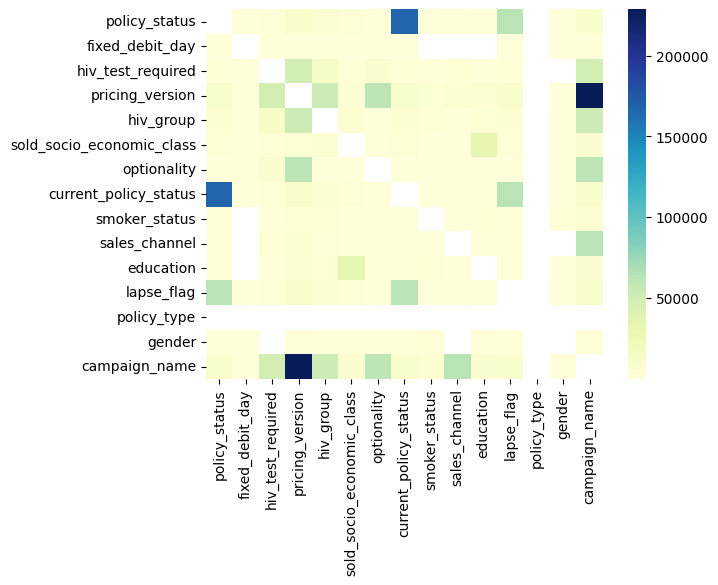

In [ ]:
cat_plot=inception_analysis.significant_corr.loc[['policy_status', 'fixed_debit_day', 'hiv_test_required',
         'pricing_version', 'hiv_group',
       'sold_socio_economic_class', 'optionality', 'current_policy_status',
       'smoker_status', 'sales_channel', 'education',  'lapse_flag', 'policy_type', 'gender',
       'campaign_name'],['policy_status', 'fixed_debit_day', 'hiv_test_required',
        'pricing_version', 'hiv_group',
       'sold_socio_economic_class', 'optionality', 'current_policy_status',
       'smoker_status', 'sales_channel', 'education', 'lapse_flag', 'policy_type', 'gender',
       'campaign_name']].applymap(
    lambda x: np.nan if (isinstance(x, float) and pd.isnull(x)) 
    else (np.nan if not isinstance(x, (list, np.ndarray)) 
          else (x[0] if len(x) > 0 else np.nan)))
np.fill_diagonal(cat_plot.values, np.nan)

sns.heatmap(cat_plot, cmap="YlGnBu")
plt.show()

C:\Users\E1005279\AppData\Local\Temp\ipykernel_1180\1810358310.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  'res_code_payment_sum', 'res_code_claims_sum', 'income']].applymap(


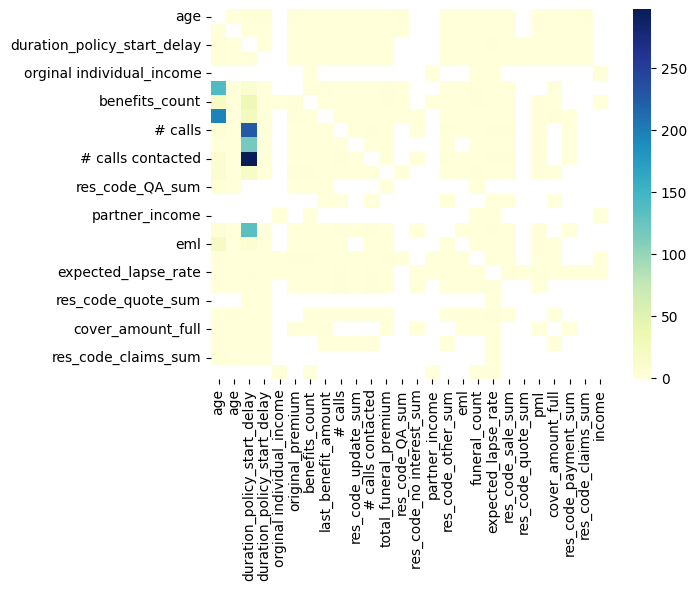

In [125]:
num_plot=inception_analysis.significant_corr.loc[['age',
       'duration_policy_start_delay',  'orginal individual_income', 'original_premium',
       'benefits_count', 'last_benefit_amount', '# calls',
       'res_code_update_sum', '# calls contacted', 'total_funeral_premium',
       'res_code_QA_sum', 'res_code_no interest_sum', 'partner_income',
       'res_code_other_sum', 'eml', 
       'funeral_count', 'expected_lapse_rate', 'res_code_sale_sum',
       'res_code_quote_sum', 'pml', 'cover_amount_full',
       'res_code_payment_sum', 'res_code_claims_sum', 'income'],['age',
       'duration_policy_start_delay',  'orginal individual_income', 'original_premium',
       'benefits_count', 'last_benefit_amount', '# calls',
       'res_code_update_sum', '# calls contacted', 'total_funeral_premium',
       'res_code_QA_sum', 'res_code_no interest_sum', 'partner_income',
       'res_code_other_sum', 'eml', 
       'funeral_count', 'expected_lapse_rate', 'res_code_sale_sum',
       'res_code_quote_sum', 'pml', 'cover_amount_full',
       'res_code_payment_sum', 'res_code_claims_sum', 'income']].applymap(
    lambda x: (np.nan if pd.isnull(x) else x) if (isinstance(x, float)) 
    else (np.nan if not isinstance(x, (list, np.ndarray)) 
          else (x[0] if len(x) > 0 else np.nan)))
np.fill_diagonal(num_plot.values, np.nan)
sns.heatmap(num_plot, cmap="YlGnBu")
plt.show()

## Near future lapse data